In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [93]:
heur = pd.read_csv('param_variation.txt', encoding='utf-8')
#heur = heur.loc[heur['param']%1==0]
heur_param['param'] = heur['param'].astype(str)

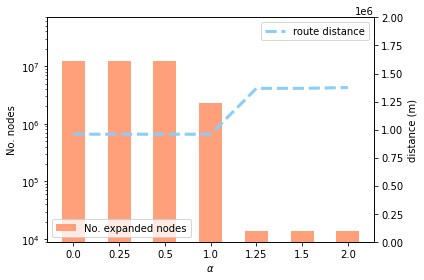

In [113]:
fig, ax1 = plt.subplots()
lns1 = ax1.bar(heur_param['param'], heur_param['closed_nodes'], width = 0.5, color = 'lightsalmon', label = 'No. expanded nodes')
ax1.set_xlabel('$\\alpha$')
ax1.set_ylabel('No. nodes')
ax1.set_ylim([9e3,7e7])
ax1.set_yscale('log')
ax1.legend(loc=3)

ax2 = ax1.twinx()
lns2 = ax2.plot(heur_param['param'], heur_param['distance'], '--', linewidth=3, label='route distance', color='lightskyblue')
ax2.set_ylabel('distance (m)')
ax2.set_ylim([0, 2e6])
ax2.legend(loc=0)

plt.tight_layout()
plt.savefig('nodes_distance.png', dpi=300)

In [80]:
heur_2 = heur_param.copy()

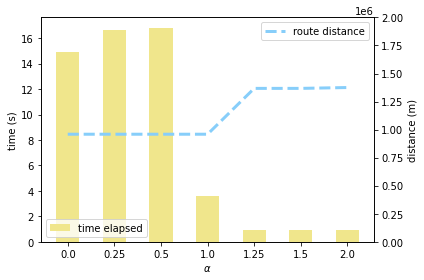

In [210]:
fig, ax1 = plt.subplots()
lns1 = ax1.bar(heur_param['param'], heur_param['time'], width = 0.5, color = 'khaki', label = 'time elapsed')
ax1.set_xlabel('$\\alpha$')
ax1.set_ylabel('time (s)')
ax1.legend(loc=3)

ax2 = ax1.twinx()
lns2 = ax2.plot(heur_param['param'], heur_param['distance'], '--', linewidth=3, label='route distance', color='lightskyblue')
ax2.set_ylabel('distance (m)')
ax2.set_ylim([0, 2e6])
ax2.legend(loc=0)

plt.tight_layout()
plt.savefig('time-distance.png', dpi=300)

In [236]:
heur2 = heur.loc[heur['param']%1==0].copy()
heur2['name'] = ['Dijsktra', 'Admissible A*', 'Inadmissible A*']
heur2 = heur2.set_index(['name'])

heur2=heur2.transpose()

In [237]:
heur2 = heur2.loc[['distance', 'time']].copy()

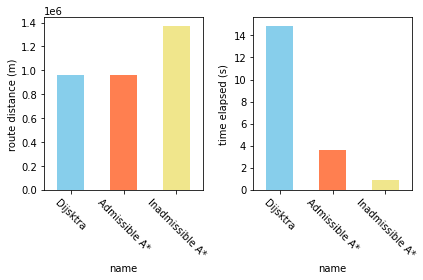

In [254]:
fig, axs = plt.subplots(1,2)
heur2.loc['distance'].plot.bar(ax=axs[0], rot=-45, color=['skyblue', 'coral', 'khaki'])
axs[0].set_ylabel('route distance (m)')
axs[1].set_ylabel('time elapsed (s)')
heur2.loc['time'].plot.bar(ax=axs[1], rot=-45, color=['skyblue', 'coral', 'khaki'])
plt.tight_layout()
plt.savefig('distance-time.png', dpi=300)

In [222]:
heur2.loc[['param', 'distance', 'time']]

name,Dijsktra,Admissible A*,Inadmissible A*
param,0.000000,1.000000,2.000000e+00
distance,958816.337217,958816.337217,1.374972e+06
time,14.894137,3.626733,9.153612e-01


AttributeError: 'DataFrame' object has no attribute 'distance'

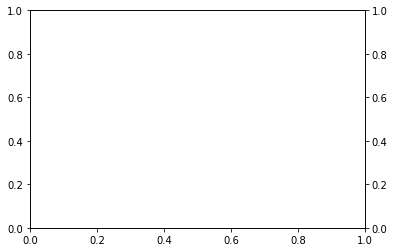

In [240]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3
heur2.distance.plot(kind='bar', color='skyblue', ax=ax, width=width, position=0, ylim=[0, 1.7e6], legend = 'route distance', rot=0)
heur2.time.plot(kind='bar', color='coral', ax=ax2, width=width, position=0, ylim=[0, 17], legend = 'time elapsed')
ax2.legend(loc=0)
ax.legend(loc=2)

ax.set_ylabel('distance (m)')
ax2.set_ylabel('time elapsed (s)')
ax2.set_xlabel('')
ax.set_xlabel('')
plt.tight_layout()
plt.savefig('distance-time.png', dpi=300)

In [187]:
perf = pd.read_csv('heur_perf.txt', index_col='heuristic')
perf = perf.rename({'time_no_opt': 'No optimization', 'time_O3': 'O3 optimization', 'time_Ofast': 'Ofast optimization'}, axis=1)

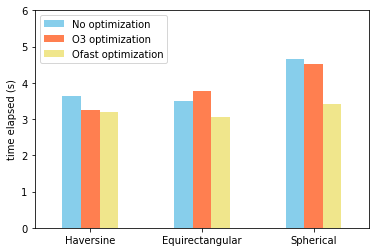

In [216]:
fig, ax = plt.subplots()
perf.plot.bar(rot=0, color=['skyblue', 'coral', 'khaki'], ax=ax)
ax.set_ylim([0,6])
ax.set_ylabel('time elapsed (s)')
ax.set_xlabel('')
plt.savefig('perfs.png', dpi=300)